# Ensemble classification test with unsmoothed data

In [4]:
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import ols_functions as of

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['figure.facecolor'] = 'white'

## import variables saved for ensemble regression
Once nice thing about trees is that they don't care about distributions and scaling, so we don't need to do extensive feature scaling here.

In [97]:
reload(of)
allX, allY = of.get_data_for_ensemble()

In [98]:
allX.fillna(value=0, inplace=True)

In [99]:
print allX.shape
print allY.shape

(763247, 109)
(763247,)


In [120]:
if "rank" in allX.columns:
    allX.drop('rank', axis=1, inplace=True)

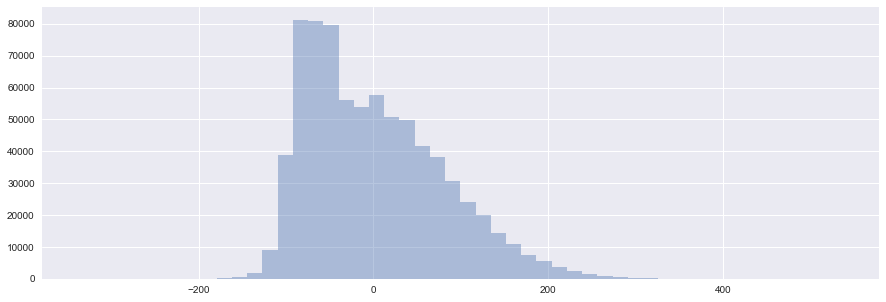

In [160]:
sns.distplot(allY.dropna(), kde=False)

In [5]:
with open('ensemble_data.pickle') as f:
    data = pickle.load(f)

df_train = data['xtrain']
df_val = data['xval']
df_test = data['xtest']

y_train = data['ytrain']
y_val = data['yval']
y_test = data['ytest']

## train/test/val data

In [6]:
with open('set_train.txt') as f:
    settrain = [t.strip() for t in f.readlines()]
with open('set_test.txt') as f:
    settest = [t.strip() for t in f.readlines()]
with open('set_val.txt') as f:
    setval = [t.strip() for t in f.readlines()]

In [122]:
df_train = allX.loc[settrain]
df_test = allX.loc[settest]

df_val = allX.loc[setval]

In [123]:
print df_train.shape
print df_val.shape
print df_test.shape

(340769, 108)
(108925, 108)
(146383, 108)


In [103]:
y_train = allY.loc[settrain]
y_val = allY.loc[setval]
y_test = allY.loc[settest]

In [104]:
print y_train.shape
print y_test.shape
print y_val.shape

(340769,)
(146383,)
(108925,)


In [7]:
for c in df_train.columns:
    print c

java
lowlevel
max_error_contest
max_error_practice
max_probability_contest
max_probability_practice
max_ratingdiff_contest
max_ratingdiff_practice
max_solvetime
max_timediff
max_wrong_contest
max_wrong_practice
mean_error_contest
mean_error_practice
mean_probability_contest
mean_probability_practice
mean_ratingdiff_contest
mean_ratingdiff_practice
mean_solvetime
mean_timediff
mean_wrong_contest
mean_wrong_practice
min_solvetime
min_timediff
n100
n200
n300
n400
n500
n_solved
n_unlikely01
n_unlikely02
oldrating
performance
python
smoothed_1months
smoothed_2months
smoothed_3months
smoothed_4months
smoothed_5months
std_error_contest
std_error_practice
std_probability_contest
std_probability_practice
std_ratingdiff_contest 
std_ratingdiff_practice
std_solvetime
std_timediff
std_wrong_contest
std_wrong_practice
tot_solvetime
total_contests
total_error_contest
total_error_practice
total_newtags
total_problems
total_wrong_contest
total_wrong_practice
unique_newtags
unique_tags_total
*special
2

## Export for gridsearch

In [140]:
out = dict(
    xtrain=df_train,
    ytrain=y_train,
    xval=df_val,
    yval=y_val,
    xtest=df_test,
    ytest=y_test,
)
import pickle
with open('ensemble_data.pickle', 'w') as f:
    pickle.dump(out, f)

##  light RF regressor

In [18]:
drop_features = [ '2-sat', '*special', 'chinese remainder theorem', 'fft', 'n_harder', 'n_harder100', 'n_harder50', 'n_harder500', 'n_unlikely01', 'n_unlikely02' ]
drop_features.extend([c for c in df_train.columns if 'max' in c])
drop_features.extend([c for c in df_train.columns if 'std' in c])
drop_features.extend([c for c in df_train.columns if 'probability' in c])

In [20]:
df_train_lite = df_train.drop(drop_features, axis=1)
df_test_lite = df_test.drop(drop_features, axis=1)
df_val_lite = df_val.drop(drop_features, axis=1)

In [37]:
rf = RandomForestRegressor(n_estimators=10,
                           random_state=12358,
                           verbose=1,
                           min_samples_split=3,
                           n_jobs=-1,
                           max_depth=20)

In [38]:
model = rf.fit(df_train_lite, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished


In [39]:
model.score(df_test_lite, y_test)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished


0.40371423753558394

In [36]:
with open('test.pickle', 'w') as f:
    pickle.dump(model, f)

## RF regressor

In [137]:
rf = RandomForestRegressor(n_estimators=100, random_state=12358, verbose=1, min_samples_split=3, n_jobs=-1)

In [138]:
model = rf.fit(df_train, y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.5min


KeyboardInterrupt: 

In [ ]:
#class sklearn.model_selection.GridSearchCV(estimator,
#                                           param_grid,
#                                           scoring=None,
#                                           fit_params=None,
#                                           n_jobs=1,
#                                           iid=True,
#                                           refit=True,
#                                           cv=None,
#                                           verbose=0,
#                                           pre_dispatch='2*n_jobs',
#                                           error_score='raise',
#                                           return_train_score=True)

In [ ]:
test = model.decision_path(np.array(df_train_ok)[0,:])

In [199]:
print model.score(df_train, y_train)
print model.score(df_val, y_val)
print model.score(df_test, y_test)

0.902098476175
0.66733576938
0.497941044347


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.8s finished


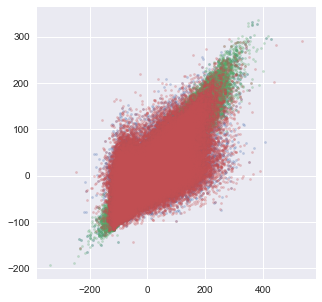

In [132]:
plt.scatter(y_val, rf.predict(df_val), s=5, alpha=.3)
plt.scatter(y_train, rf.predict(df_train), s=5, alpha=.3)
plt.scatter(y_test, rf.predict(df_test), s=5, alpha=.3)

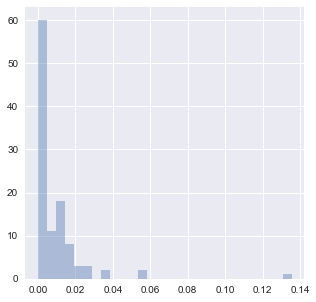

In [133]:
sns.distplot(model.feature_importances_, kde=False)

In [134]:
imp = pd.Series(model.feature_importances_)
imp.index = df_train.columns

In [191]:
impsorted = imp.sort_values(ascending=False)
for a, b in zip(impsorted.index, impsorted):
    print a, b

performance 0.135512490971
n100 0.0559104041845
oldrating 0.0542871348115
mean_probability_contest 0.0380339761004
max_ratingdiff_contest 0.0355780472642
total_contests 0.0289681646377
mean_wrong_contest 0.02637961358
rating_diff_mean 0.0261273296975
std_solvetime 0.023590370124
smoothed_5months 0.0219316006685
std_probability_contest 0.0205675777546
max_probability_contest 0.0171872939826
mean_ratingdiff_contest 0.01712901565
smoothed_4months 0.0166525205012
smoothed_3months 0.0162239476771
total_problems 0.0160736700687
min_timediff 0.0158182545995
std_ratingdiff_contest  0.015196555682
max_timediff 0.0146737506182
mean_timediff 0.0145016357469
mean_solvetime 0.0138521626852
n_wrong_mean 0.0136599697153
std_timediff 0.0136341688208
smoothed_1months 0.0134338690417
smoothed_2months 0.0131757216191
rating_diff_std 0.0131609578248
std_wrong_contest 0.0130812114349
max_ratingdiff_practice 0.0130387777189
mean_ratingdiff_practice 0.0126628955119
mean_probability_practice 0.0113233950284
t

###  "local" landscape

In [185]:
usr = 'yj12'
x_user = df_train.loc[usr].iloc[-1]
y_user = y_train.loc[usr].iloc[-1]

In [186]:
model.predict([x_user])

array([ 19.351])

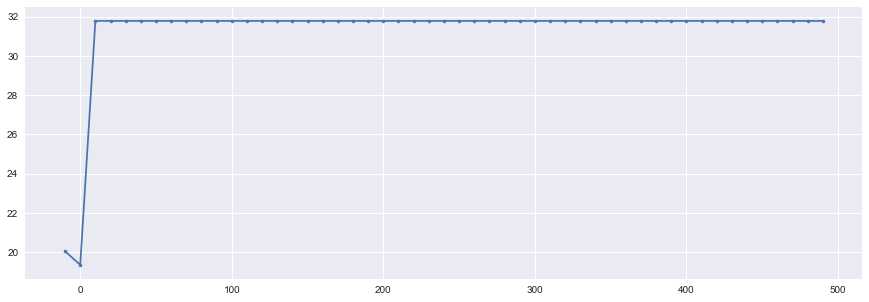

In [194]:
eps = 1
model.verbose = 0
model.n_jobs = -1
varidx = np.argwhere(df_test.columns == 'implementation')[0]
x = range(-10, 500, 10)
y = []
testin = x_user
for i in x:
    testin2 = testin.copy()
    testin2[varidx] += eps * i
    y.append(model.predict([testin2]))

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(x, y)
plt.scatter(x, y, s=10)


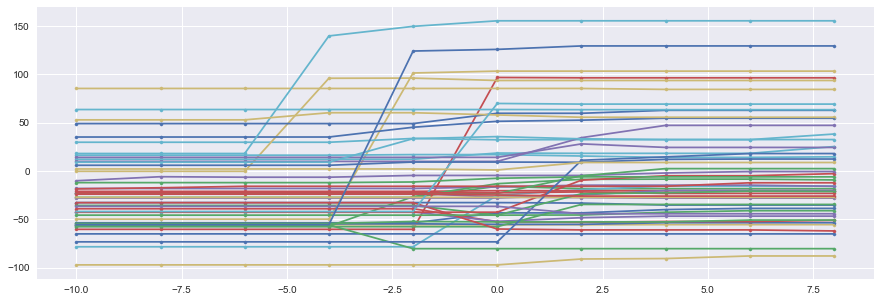

In [164]:
eps = 1
model.verbose = 0
model.n_jobs = -1
varidx = np.argwhere(df_test.columns == 'n100')[0]
x = range(-10, 10, 2)
for i_handle in range(50):
    y = []
    testin = np.array(df_test.iloc[i_handle])
    testin = testin.reshape(1, -1)
    for i in x:
        testin2 = testin.copy()
        testin2[0][varidx] += eps * i
        y.append(model.predict(testin2))

    plt.rcParams['figure.figsize'] = (15, 5)
    plt.plot(x, y)
    plt.scatter(x, y, s=10)

# playing around with test sets

In [ ]:
df_last = pd.read_csv('OLStrain_all_normalized_data_last.csv')

In [154]:
test = df_last.loc['chenmark', df_train.columns]

model.predict(test) * 532.75

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([-3.08058036])

In [176]:
model.score(df_val_ok, yval_val_ok)

0.87794472739190932

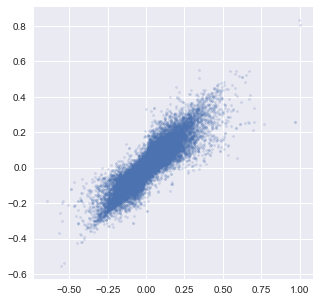

In [185]:
ypred = model.predict(df_test_ok)

plt.scatter(yval_test_ok, ypred, alpha=.2, s=5)

# Evaluation of RF regressor gridsearch

(0, 1)

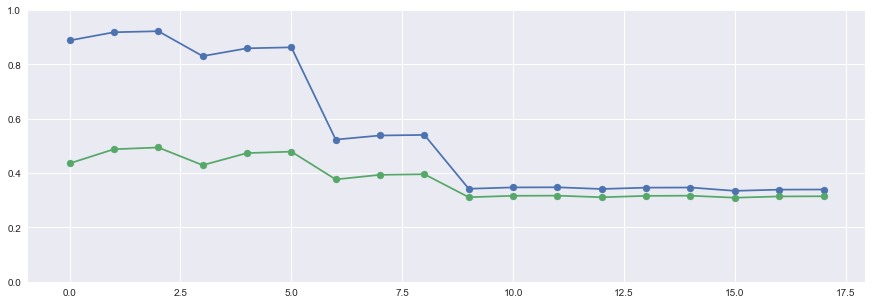

In [200]:
mean_train = [ 0.88798361, 0.91819194, 0.92200325, 0.83035232, 0.85904441,
0.86268509, 0.52323376, 0.5383282, 0.54032354, 0.34231627, 0.3472547,
0.34772467, 0.34145768, 0.34641281, 0.34687047, 0.33461187, 0.3391164, 0.3395756 ]

mean_test =  [ 0.43562267, 0.48781082, 0.49414268, 0.42917878, 0.47359824, 0.47886582, 0.37671474, 0.39359301, 0.3957742, 0.31119946, 0.31641945, 0.31700674, 0.31100393, 0.31620479, 0.31681078, 0.30938668, 0.31407653, 0.31467579]

plt.plot(range(len(mean_train)), mean_train)
plt.plot(range(len(mean_test)), mean_test)
plt.scatter(range(len(mean_train)), mean_train)
plt.scatter(range(len(mean_test)), mean_test)
plt.ylim(0, 1)

In [208]:
with open("rfregressor_gridsearch_best_estimator.pickle") as f:
    gmodel = pickle.load(f)

In [220]:
print gmodel.score(df_train, y_train)
print gmodel.score(df_test, y_test)

0.924857828581
0.532338111948


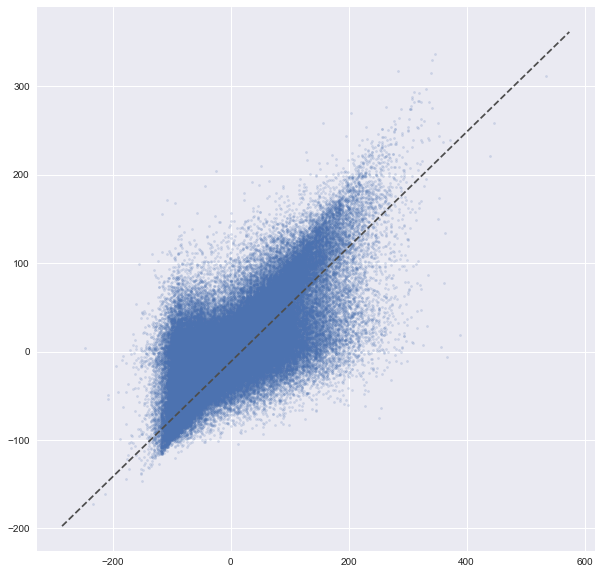

In [218]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(y_test, gmodel.predict(df_test), s=5, alpha=.2)

ax=plt.gca()
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

In [219]:
y_test_pred = gmodel.predict(df_test)
print sum(np.logical_and(y_test_pred > 0, y_test < 0))
print sum(np.logical_and(y_test_pred < 0, y_test > 0))
print sum(np.logical_and(y_test_pred > 0, y_test > 0))
print sum(np.logical_and(y_test_pred < 0, y_test < 0))

16670
14145
51296
63418


In [212]:
imp = pd.Series(gmodel.feature_importances_)
imp.index = df_train.columns

In [340]:
imp = imp.sort_values(ascending=False)

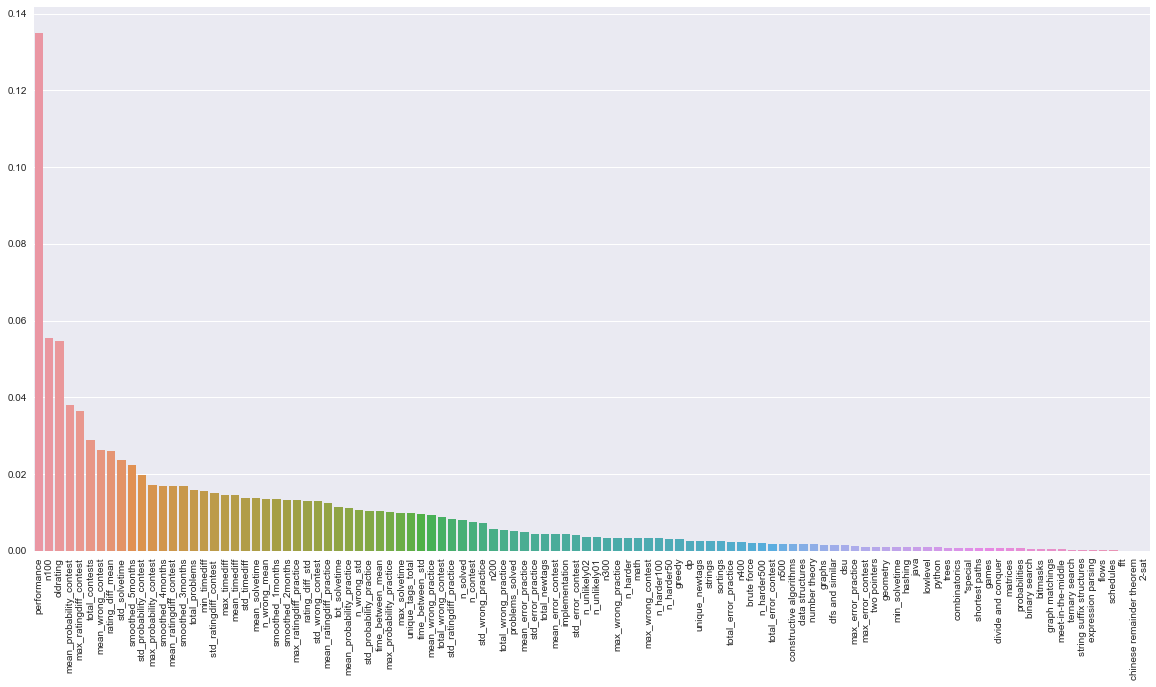

In [349]:
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['figure.figsize'] = (20, 10)

sns.barplot(imp.index, imp)
ax = plt.gca()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)

pp = PdfPages('fig_feature_importance.pdf')
pp.savefig()
pp.close()

In [274]:
ex = df_train.loc['yj12'].iloc[-1]
print gmodel.predict([ex])
ex['n100'] += 30
#ex['graphs'] += 10
print gmodel.predict([ex])

[ 24.75]
[ 36.88]


In [ ]:
import psycopg2
con = psycopg2.connect(database='codeforces', user="Joy")
q = """ 
select tag from all_tags
"""
all_tags = pd.read_sql(q, con)['tag']
all_tags = set(all_tags)

In [294]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150
ex

java                              0.000000
lowlevel                          1.000000
max_error_contest                 1.000000
max_error_practice                0.000000
max_probability_contest           0.964964
max_probability_practice          0.135453
max_ratingdiff_contest          421.000000
max_ratingdiff_practice         397.000000
max_solvetime                   401.822500
max_timediff                     16.006516
max_wrong_contest                 3.000000
max_wrong_practice                6.000000
mean_error_contest                0.071429
mean_error_practice               0.000000
mean_probability_contest          0.629920
mean_probability_practice         0.115554
mean_ratingdiff_contest        -134.571429
mean_ratingdiff_practice        355.666667
mean_solvetime                   26.013819
mean_timediff                     2.266270
mean_wrong_contest                0.428571
mean_wrong_practice               3.000000
min_solvetime                    -1.000000
min_timedif

In [1]:
ex = df_train.loc['yj12'].iloc[-1]
orig = gmodel.predict([ex])[0]
for t in list(all_tags) + ['n100', 'n200', 'n300', 'n400', 'n500', 'n_solved']:
#for t in ['mean_wrong_practice', 'mean_wrong_contest', 'mean_timediff', 'std_timediff', 'tot_solvetime']:
#for t in ['oldrating']:
#for t in ['mean_ratingdiff_contest', 'mean_ratingdiff_practice']:
#for t in ['fft']:
    e = ex.copy()
    e[t] += 20
    print t, gmodel.predict([e])[0] - orig

NameError: name 'df_train' is not defined